In [4]:
%config IPCompleter.greedy = True
%autosave 60
%matplotlib inline

Autosaving every 60 seconds


## Ejercicio

Utilizando los datos sobre automoviles extraídos en un archivo csv via webscraping (están almacenados en un archivo csv en la misma ruta que este notebook), responda a las siguientes preguntas:

1. [La asimetría de la variable `caballos_potencia` es negativa?](#1)
2. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles tienen valores atípicos en ambos extremos?](#2)
3. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles no tienen valores atípicos?](#3)
4. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`,, ¿cuáles son las variables con mayor y menor asimetría?](#4)
5. [Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, muestre los valores atípicos de aquellas variables que los tengan en ambos extremos.](#5)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

automoviles = pd.read_csv('datos_automoviles.csv')
automoviles.head()

{'Europe': Int64Index([ 10,  25,  26,  27,  28,  29,  39,  57,  58,  59,  62,  66,  83,
              84,  85,  86, 109, 121, 124, 125, 126, 127, 129, 148, 149, 150,
             154, 155, 158, 179, 182, 184, 185, 186, 187, 189, 190, 193, 204,
             210, 214, 216, 218, 225, 240, 247, 249, 251, 281, 282, 283, 284,
             285, 300, 304, 306, 311, 316, 324, 332, 333, 334, 335, 337, 339,
             342, 360, 361, 366, 367, 368, 383, 402],
            dtype='int64'),
 'Japan': Int64Index([ 20,  24,  35,  37,  60,  61,  64,  78,  88,  89,  91, 115, 117,
             118, 130, 136, 138, 151, 152, 156, 157, 174, 178, 180, 188, 205,
             211, 212, 217, 223, 227, 242, 246, 248, 250, 253, 254, 255, 274,
             275, 277, 280, 286, 301, 310, 317, 319, 325, 326, 327, 328, 329,
             331, 336, 338, 340, 341, 344, 350, 352, 353, 354, 355, 356, 362,
             363, 364, 365, 369, 370, 384, 385, 388, 389, 390, 391, 392, 393,
             398],
            dtype='int

### 1. La asimetría de la variable `caballos_potencia` es negativa?
<a id="1"></a>

In [5]:
print('Asimetría de caballos_potencia')
automoviles['caballos_potencia'].skew()

Asimetría de caballos_potencia


1.034079427703104

### 2. Entre las variables: `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles tienen valores atípicos en ambos extremos?
<a id="2"></a>

Para saber cúales variables tiene valores atípicos, se puede utilizar gráficos o métido el analítico. En este caso, se utilizarán gráficas de dos tipos:

- Una será una gráfica de distribución donde se dibujarán líneas verticales a la altura de ambos valores atípicos.
- La otra, un *gráfico de caja* el cual nos señala mediante un círculo si existen o no valores atípicos

Cabe resaltar que la primera manera no indica de manera precisa la existencia de valores atípicos, pero se lo muestra por propósitos ilustrativos. En cambio, el *gráfico de caja* si indica con exactidud si existen o no valores atípicos.

In [21]:
def graficar_distribucion_con_valores_atipicos(columna):
    q1 = automoviles.describe()[columna]['25%']
    q3 = automoviles.describe()[columna]['75%']
    iqr = q3 - q1
    limite_derecho = q3 + 1.5 * iqr
    limite_izquierdo = q1 - 1.5 * iqr

    sns.kdeplot(automoviles[columna], shade=True)
    plt.axvline( limite_derecho, color='b')
    plt.axvline( limite_izquierdo, color='b')

#### 2.1 Valores atípicos `caballos_potencia`

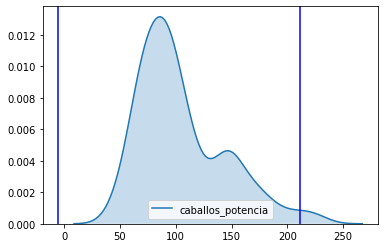

In [22]:
graficar_distribucion_con_valores_atipicos('caballos_potencia')

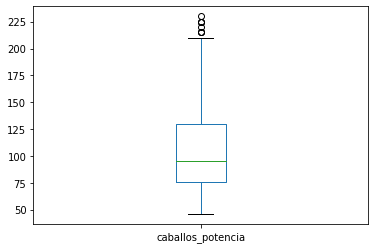

In [23]:
automoviles['caballos_potencia'].plot.box()

#### 2.2 Valores atípicos `desplazamiento`

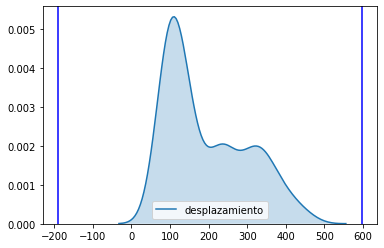

In [12]:
graficar_distribucion_con_valores_atipicos('desplazamiento')

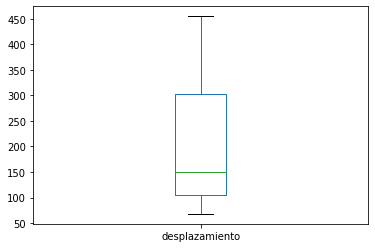

In [13]:
automoviles['desplazamiento'].plot.box()

#### 2.3 Valores atípicos `mpg`

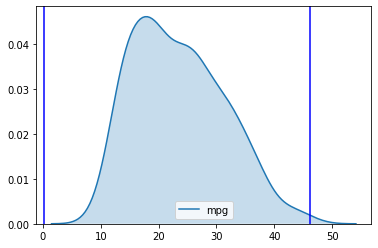

In [16]:
graficar_distribucion_con_valores_atipicos('mpg')

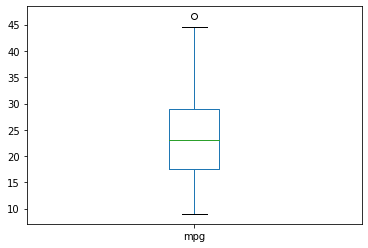

In [17]:
automoviles['mpg'].plot.box()

#### 2.4 Valores atípicos `aceleracion`

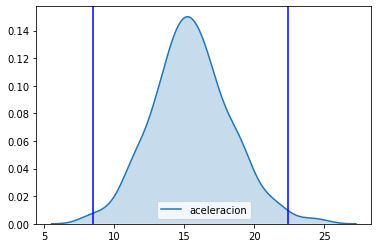

In [18]:
graficar_distribucion_con_valores_atipicos('aceleracion')

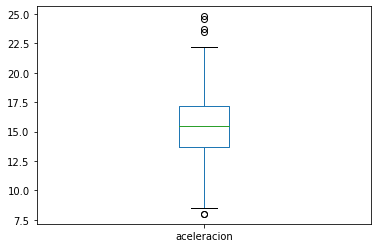

In [19]:
automoviles['aceleracion'].plot.box()

#### Respuesta pregunta 2: la `aceleración` es la única variable que tiene valores atípicos en ambos extremos

### 3. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles no tienen valores atípicos?
<a id="3"></a>

Sobre la base de los gráficos hechos en el anterior inciso, `desplazamiento` es la variable que no tiene valores atípicos

### 4. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, ¿cuáles son las variables con mayor y menor asimetría?
<a id="4"></a>

In [27]:
print('caballos_potencia: ', automoviles['caballos_potencia'].skew())
print('desplazamiento: ', automoviles['desplazamiento'].skew())
print('mpg: ', automoviles['mpg'].skew())
print('aceleracion:', automoviles['aceleracion'].skew())

caballos_potencia:  1.034079427703104
desplazamiento:  0.6941299865999901
mpg:  0.45706634399491936
aceleracion: 0.23022375946556034


### 5. Entre las variables:  `caballos_potencia`, `desplazamiento`, `mpg` y  `aceleracion`, muestre los valores atípicos de aquellas variables que los tengan en ambos extremos.
<a id="5"></a>

Como se pudo observar en el __[inciso 2](#2)__ la variable `aceleracion` es la única que tiene valores atípicos en ambos extremos.

In [31]:
q1 = automoviles.describe()['aceleracion']['25%']
q3 = automoviles.describe()['aceleracion']['75%']
iqr = q3 - q1
limite_derecho = q3 + 1.5 * iqr
limite_izquierdo = q1 - 1.5 * iqr

Valores atípicos menores o iguales al límite inferior:

In [32]:
automoviles.loc[automoviles['aceleracion'] <= limite_izquierdo]

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
16,Plymouth 'Cuda 340,8,3609,1970,USA,8.0,14.0,160.0,340.0
17,Ford Mustang Boss 302,8,3353,1970,USA,8.0,NaN,140.0,302.0


Valores atípicos mayores o iguales al límite superior:

In [33]:
automoviles.loc[automoviles['aceleracion'] >= limite_derecho]

,nombre,cilindros,peso,anio,territorio,aceleracion,mpg,caballos_potencia,desplazamiento
66,Volkswagen Type 3,4,2254,1972,Europe,23.5,23.0,54.0,97.0
306,Peugeot 504,4,3190,1979,Europe,24.8,27.2,71.0,141.0
333,Vw Dasher (Diesel),4,2335,1980,Europe,23.7,43.4,48.0,90.0
402,Vw Pickup,4,2130,1982,Europe,24.6,44.0,52.0,97.0


- Hay alguna relacion entre el territorio y los caballos de potencia?
- Hay correlación entre los caballos de potencia y las millas por galón? 
- Si existe es un relación, ambas variables se mueven en la misma dirección?
- Compruebe la dirección de la relación con una visualización.

In [44]:


def territorio_escrito_a_num(territorio):
    if territorio == serie_paises[1]:
        return 1
    elif territorio == serie_paises[2]:
        return 2
    elif territorio == serie_paises[3]:
        return 3
        
  


data['territorio_num'] = territorio_escrito_a_num(data['territorio'])
data

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

1       USA
2    Europe
3     Japan
dtype: object

In [10]:
data.corr()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
cilindros,1.000000,0.895220,-0.360762,-0.522452,-0.775396,0.844158,0.951787
peso,0.895220,1.000000,-0.315389,-0.430086,-0.831741,0.866586,0.932475
anio,-0.360762,-0.315389,1.000000,0.301992,0.579267,-0.424419,-0.381714
aceleracion,-0.522452,-0.430086,0.301992,1.000000,0.420289,-0.697124,-0.557984
mpg,-0.775396,-0.831741,0.579267,0.420289,1.000000,-0.778427,-0.804203
caballos_potencia,0.844158,0.866586,-0.424419,-0.697124,-0.778427,1.000000,0.898326
desplazamiento,0.951787,0.932475,-0.381714,-0.557984,-0.804203,0.898326,1.000000


Los caballos de potención tienen una relación con las millas por galón, debido el valor de correlación es 0.77 y es próximo a -1. Lo cual indica una relación inversa.

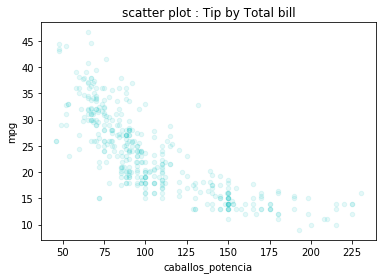

In [13]:

data.plot.scatter(x='caballos_potencia', y='mpg', color='c', title='scatter plot : Tip by Total bill', alpha=0.1)


No se mueven en la misma dirección

In [11]:
data.cov()

,cilindros,peso,anio,aceleracion,mpg,caballos_potencia,desplazamiento
cilindros,2.931491,1298.254662,-2.315526,-2.507662,-10.308911,56.184831,170.982829
peso,1298.254662,717416.332056,-1001.421626,-1021.220272,-5505.211745,28538.206404,82868.813665
anio,-2.315526,-1001.421626,14.053032,3.173656,16.741163,-61.462080,-150.138405
aceleracion,-2.507662,-1021.220272,3.173656,7.858821,9.058930,-75.801907,-164.122683
mpg,-10.308911,-5505.211745,16.741163,9.058930,61.089611,-233.857926,-655.402318
caballos_potencia,56.184831,28538.206404,-61.462080,-75.801907,-233.857926,1503.018239,3666.724846
desplazamiento,170.982829,82868.813665,-150.138405,-164.122683,-655.402318,3666.724846,11008.722272
